In [90]:

from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
#Dataset: [Study Hours, Sleep Hours]

X = [[5, 7], [2, 8], [6, 6], [1, 9]]
y = ["Pass", "Fail","Pass", "Fail"]

#Build model

model = DecisionTreeClassifier()
model.fit(X, y)
print(model.predict([[4, 6]])) # 4 hrs study, 6 hrs sleep

['Pass']


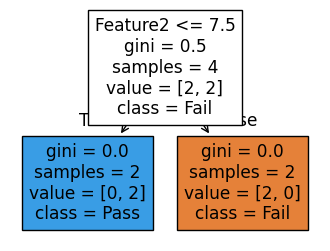

In [91]:

plt.figure(figsize=(4,3))
plot_tree(model,
          filled=True,
          feature_names=["Feature1", "Feature2"],
          class_names=model.classes_)
plt.show()

In [92]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Sample Training Data - Loan Dataset

data = {
        'Age': [25, 35, 22, 45, 30, 28, 40, 33, 27, 42, 26, 38, 29, 36, 31,
               23, 41, 32, 39, 44, 24, 37, 34, 43, 21],

        'Income': [30000, 60000, 25000, 80000, 45000, 35000, 70000, 55000, 32000, 75000,
                  28000, 65000, 40000, 58000, 48000, 22000, 72000, 52000, 68000, 78000,
                  26000, 62000, 50000, 76000, 20000],

        'Credit_Score': [650, 750, 600, 800, 700, 680, 780, 720, 660, 790,
                        640, 760, 690, 740, 710, 580, 770, 730, 750, 810,
                        620, 740, 720, 790, 560],

        'Employment': [1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
                      0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
                      0, 1, 1, 1, 0],  # 1=Employed, 0=Unemployed

        'Loan_Amount': [200000, 500000, 150000, 800000, 300000, 250000, 600000, 400000, 180000, 700000,
                       160000, 550000, 280000, 450000, 320000, 120000, 650000, 350000, 520000, 750000,
                       140000, 480000, 380000, 720000, 100000],

        'Loan_Approved': [0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
                         0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
                         0, 1, 1, 1, 0]  # 1=Approved, 0=Rejected
    }
y=pd.DataFrame(data)
print(y)

    Age  Income  Credit_Score  Loan_Amount  Loan_Approved
0    25   30000           650       200000              0
1    35   60000           750       500000              1
2    22   25000           600       150000              0
3    45   80000           800       800000              1
4    30   45000           700       300000              1
5    28   35000           680       250000              0
6    40   70000           780       600000              1
7    33   55000           720       400000              1
8    27   32000           660       180000              0
9    42   75000           790       700000              1
10   26   28000           640       160000              0
11   38   65000           760       550000              1
12   29   40000           690       280000              1
13   36   58000           740       450000              1
14   31   48000           710       320000              1
15   23   22000           580       120000              0
16   41   7200

In [93]:
print("LOAN DATASET:")
print("="*50)
print(y.head(10))
print(f"\nDataset shape: {y.shape}")
print(f"Approved loans: {sum(y['Loan_Approved'])}")
print(f"Rejected loans: {len(y) - sum(y['Loan_Approved'])}")

LOAN DATASET:
   Age  Income  Credit_Score  Loan_Amount  Loan_Approved
0   25   30000           650       200000              0
1   35   60000           750       500000              1
2   22   25000           600       150000              0
3   45   80000           800       800000              1
4   30   45000           700       300000              1
5   28   35000           680       250000              0
6   40   70000           780       600000              1
7   33   55000           720       400000              1
8   27   32000           660       180000              0
9   42   75000           790       700000              1

Dataset shape: (25, 5)
Approved loans: 17
Rejected loans: 8


In [94]:
# Features and Target
X = y[['Age', 'Income', 'Credit_Score', 'Employment', 'Loan_Amount']]
y = y['Loan_Approved']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 17
Test set size: 8


In [95]:
# Create and Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion='gini',  # Information gain measure
    max_depth=5,       # Prevent overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42)
print("\nTRAINING DECISION TREE MODEL...")
dt_model.fit(X_train, y_train)


TRAINING DECISION TREE MODEL...


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [96]:
# Model Evaluation
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nMODEL PERFORMANCE:")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.2%}")


MODEL PERFORMANCE:
Training Accuracy: 100.00%
